# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod i w pojawiającym się czarnym obrazie kliknij jeden punkt 
   2. Zamknij edycję przyciskiem w belce okna (obok bazwy Figure 1). Wygenerowany obraz będzie dostępny pod nazwą im.

In [44]:
img_list = []

In [45]:
%matplotlib notebook

#%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from matplotlib import cm
import math


In [46]:
def show_hough(h, image):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, cmap=cm.gray)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

<IPython.core.display.Javascript object>


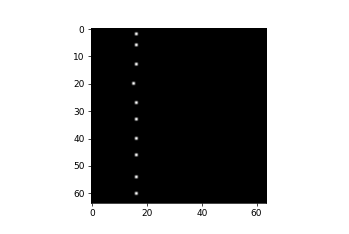

10

In [59]:
%matplotlib notebook
fig, ax = plt.subplots()
im = np.zeros((64,64), dtype=np.uint8)
ax.imshow(im, cmap=cm.gray )


def on_click(event):
    im[int(event.ydata),int(event.xdata)] = 1
    ax.imshow(im, cmap=cm.gray)
    
def on_close(event):
    img_list.append(im)
    print('on_closed')
    

fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('close_event', on_close)

3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

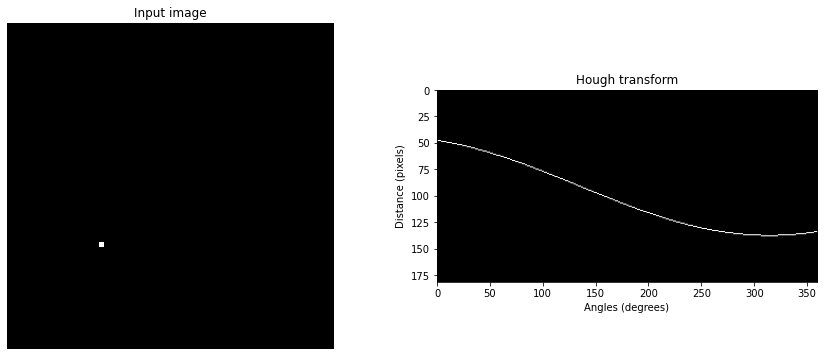

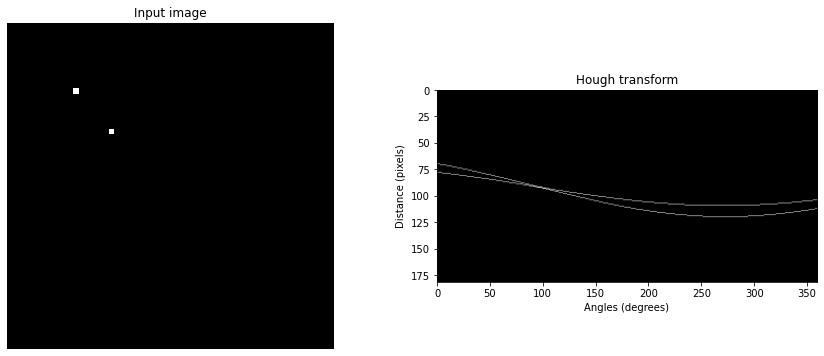

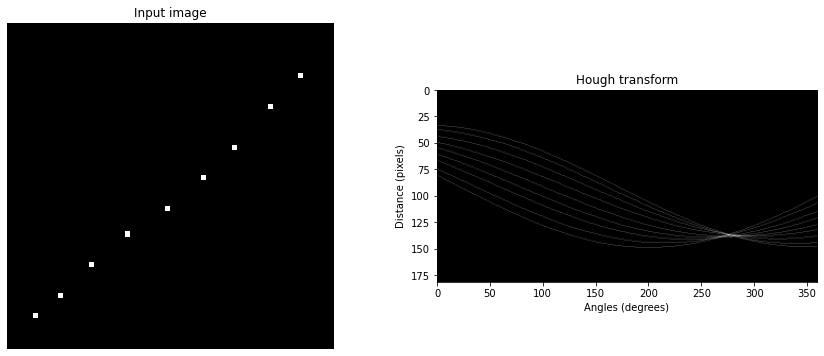

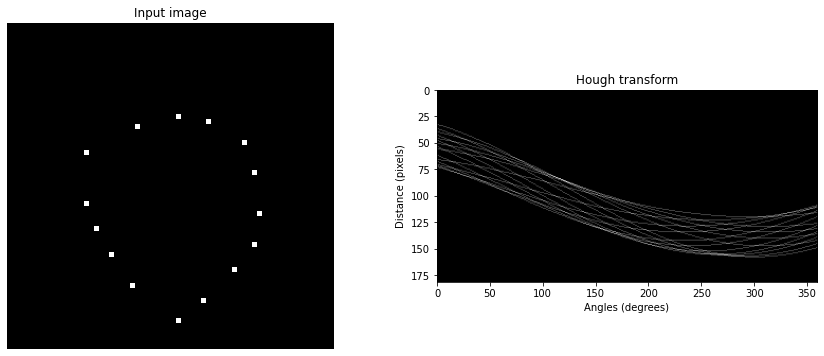

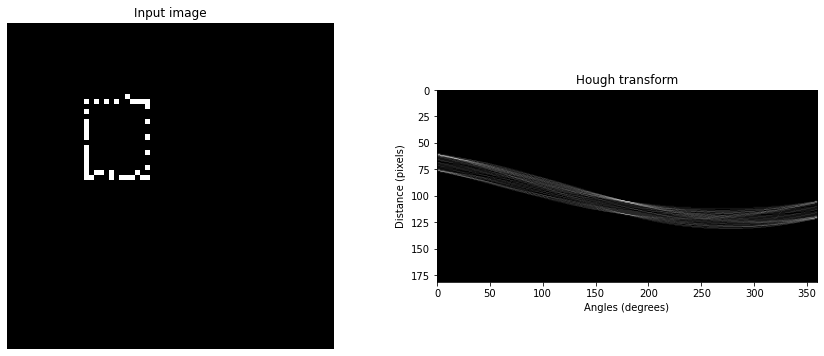

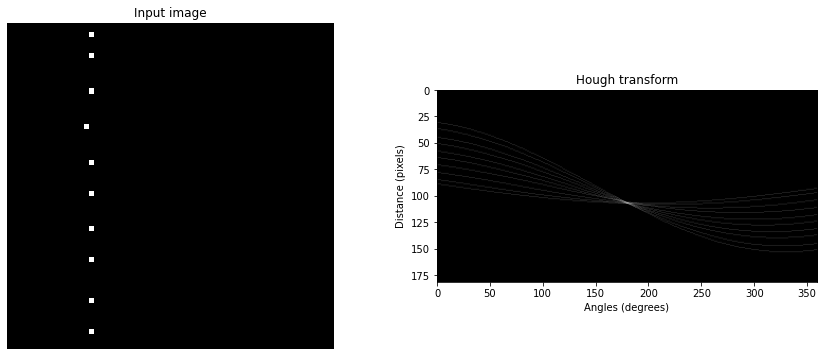

In [60]:
%matplotlib inline

for i in range(0, len(img_list), 2):
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    h, theta, d = hough_line(img_list[i], theta=tested_angles)
    show_hough(h, img_list[i])

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.tif". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

Text(0.5, 1.0, 'H Matrix from canny')

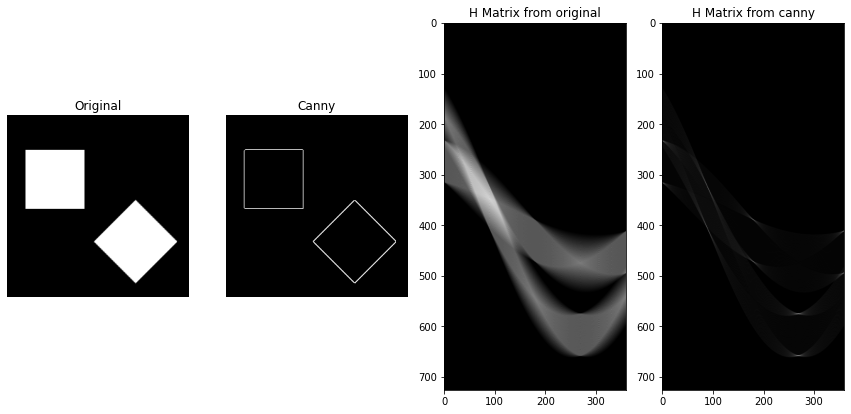

In [73]:
%matplotlib inline

from scipy import signal
img = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
canny = cv2.Canny(img, 0, 255)
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(img, theta=tested_angles)

fig, axs = plt.subplots(1, 4, figsize=(15,15))

axs[0].imshow(img, 'gray')
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(canny, 'gray')
axs[1].axis('off')
axs[1].set_title('Canny')
axs[2].imshow(h, 'gray')
axs[2].set_title('H Matrix from original')
axs[3].imshow(hough_line(canny, theta=tested_angles)[0], 'gray')
axs[3].set_title('H Matrix from canny')


 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

[  0 256]


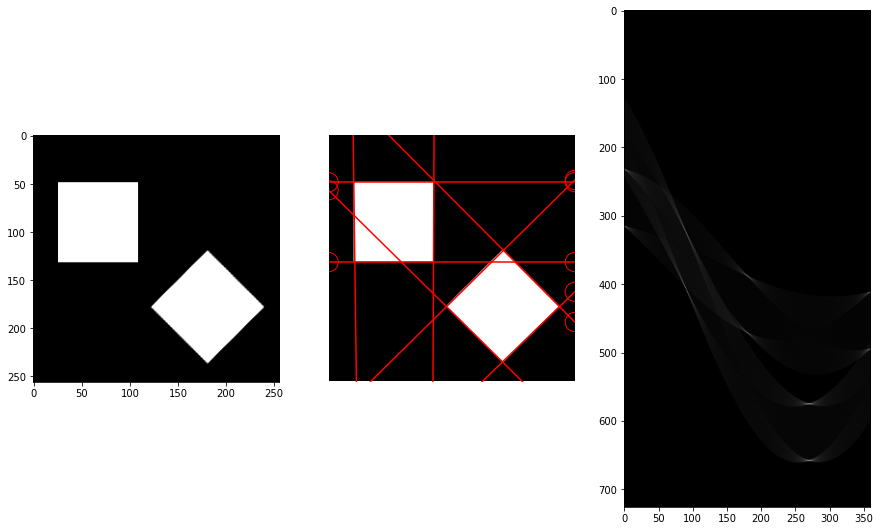

In [117]:
img = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 3, figsize=(15,15))


edges = cv2.Canny(img, 0, 255)
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(edges, theta=tested_angles)

ax[0].imshow(img, 'gray')
origin = np.array((0, edges.shape[1]))
print(origin)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    x0, x1 = origin
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot((x0, x1), (y0, y1), 'r')
    
    ax[1].add_patch(plt.Circle((x0, y0), 10, color='r', fill=False)) 
    ax[1].add_patch(plt.Circle((x1, y1), 10, color='r', fill=False)) 
    
    
    
ax[1].set_xlim(origin)
ax[1].set_ylim((img.shape[0], 0))
ax[1].set_axis_off()
ax[1].imshow(img, 'gray')

ax[2].imshow(h, cmap=cm.gray) # gdzie H jest przestrzenią Hougha


Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

In [118]:
# zawarte w kodzie wyzej

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

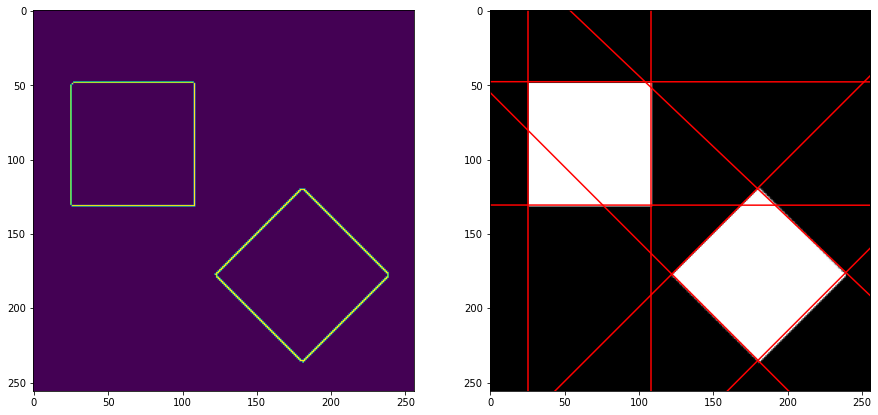

In [196]:
img = cv2.imread('kwadraty.png')
edges = cv2.Canny(img, 0, 255)
lines = cv2.HoughLines(edges, 1, np.pi / 120, 0)


fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(edges)

for i, l in enumerate(lines):
    rho, theta = l[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))  
    ax[1].plot((x1, x2), (y1, y2), 'r')
    if i > 6: break
    
    
ax[1].imshow(img)


9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

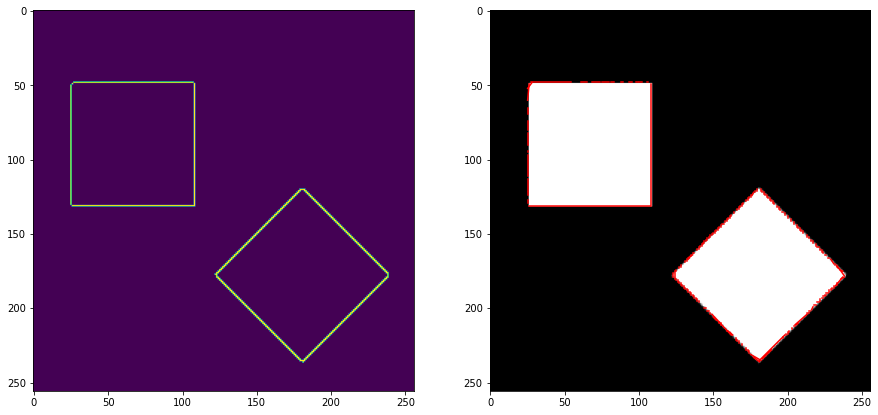

In [219]:
img = cv2.imread('kwadraty.png')
edges = cv2.Canny(img, 0, 255)
lines = cv2.HoughLinesP(edges, 1, np.pi / 90, 0, minLineLength=1, maxLineGap=5)


fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(edges)

for i, line in enumerate(lines):
    x1, y1, x2, y2 = line[0]
    ax[1].plot((x1, x2), (y1, y2), 'r')
    
    
ax[1].imshow(img)



### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.bmp". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

[  0 640]


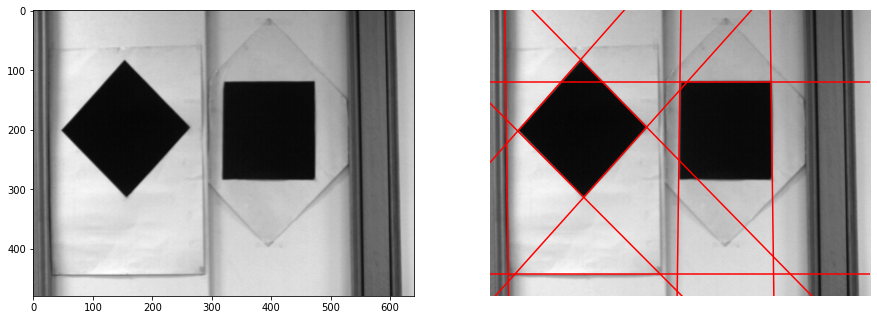

In [226]:
img = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 2, figsize=(15,15))


edges = cv2.Canny(img, 0, 255)
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(edges, theta=tested_angles)

ax[0].imshow(img, 'gray')
origin = np.array((0, edges.shape[1]))
print(origin)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    x0, x1 = origin
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot((x0, x1), (y0, y1), 'r')
    
    
    
ax[1].set_xlim(origin)
ax[1].set_ylim((img.shape[0], 0))
ax[1].set_axis_off()
ax[1].imshow(img, 'gray')

4. Wczytaj obraz "dom.tif". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

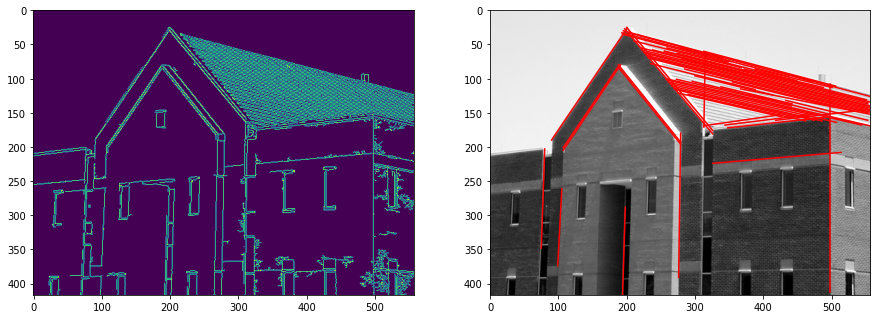

In [297]:
img = cv2.imread('dom.png')
edges = cv2.Canny(img, 255 / 3, 255)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)


fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(edges)

for i, line in enumerate(lines):
    x1, y1, x2, y2 = line[0]
    ax[1].plot((x1, x2), (y1, y2), 'r')
    
    
ax[1].imshow(img)

### Transformata Hougha w przestrzeni ab - Domowe -
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [ ]:
%matplotlib inline
